In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv('diamonds.csv', sep=',', encoding='utf-8')
columns= ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
filtered_df = df[columns]

# ANÁLISIS EXPLORATORIO

In [271]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


El análisis descriptivo de los datos numéricos revela varias ideas clave sobre las características de los diamantes:

Carat (Peso): Los diamantes en el conjunto de datos varían en peso desde 0.2 hasta 5.01 quilates, con un peso promedio de 0.798 quilates. La desviación estándar de 0.474 indica una dispersión considerable en los pesos de los diamantes.

Depth (Profundidad): La profundidad porcentual total de los diamantes oscila entre el 43% y el 79%, con un promedio del 61.75%. La desviación estándar de 1.43 sugiere una variación moderada en la profundidad.

Table (Ancho de la Tabla): El ancho de la tabla varía del 43% al 95%, con un promedio del 57.46%. La desviación estándar de 2.23 indica una amplia gama de anchos de tabla en los diamantes.


Price (Precio): Los precios de los diamantes van desde $326 hasta $18,823, con un precio promedio de $3,932.80. La desviación estándar de $3,989.44 revela una gran dispersión en los precios, lo que sugiere una amplia variedad de calidades y características en los diamantes.

Dimensiones (x, y, z): Las dimensiones de los diamantes (largo, ancho y profundidad) también muestran una variación considerable. Es interesante notar que la dimensión 'y' (ancho) tiene un valor máximo atípico de 58.9 mm, lo que podría indicar un error de datos o un diamante con una forma inusual.

In [272]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Variables Numéricas: Las columnas carat, depth, table, price, x, y, y z son numéricas (float64 para valores decimales e int64 para valores enteros). Estas variables se pueden utilizar directamente para cálculos y análisis estadísticos.
Variables Categóricas: Las columnas cut, color, y clarity son de tipo objeto, lo que sugiere que contienen valores categóricos o de texto. Estas variables requerirán codificación o transformación antes de poder ser utilizadas en modelos de aprendizaje automático.

|    |  Variable  | Media   | Mediana   | Moda   |
|:---|:----------:|:--------|:----------|:-------|
| 0  |   carat    | 0.798   | 0.7       | 0.3    |
| 1  |   depth    | 61.749  | 61.8      | 62     |
| 2  |   table    | 57.457  | 57        | 56     |
| 3  |     x      | 5.731   | 5.7       | 4.37   |
| 4  |     y      | 5.735   | 5.71      | 4.34   |
| 5  |     z      | 3.539   | 3.53      | 2.7    |


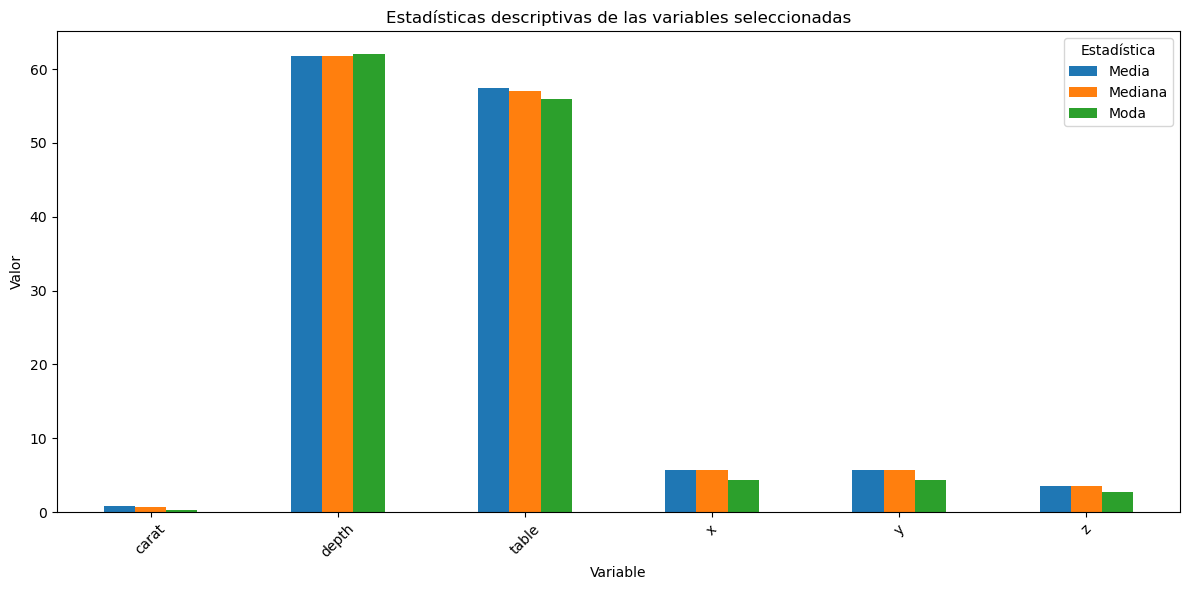

In [293]:
# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]


mean = filtered_df.mean().reset_index().round(3)
median = filtered_df.median().reset_index()
mode = filtered_df.mode().iloc[0].reset_index()

# Renombrar columnas
mean = mean.rename(columns={'index':'Variable',0:'Valor'})
median = median.rename(columns={'index':'Variable',0:'Valor'})
mode = mode.rename(columns={'index':'Variable',0:'Valor'})

mean['Statistic'] = 'Media'
median['Statistic'] = 'Mediana'
mode['Statistic'] = 'Moda'

merged_df = pd.concat([mean, median, mode])

pivoted_df = merged_df.pivot(index='Variable', columns='Statistic', values='Valor').reset_index()

print(pivoted_df.to_markdown(index=True, numalign='left', stralign='center'))

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
pivoted_df.plot(kind='bar', ax=ax)
plt.xticks(range(len(pivoted_df)), pivoted_df['Variable'], rotation=45)
plt.ylabel('Valor')
plt.title('Estadísticas descriptivas de las variables seleccionadas')
plt.xlabel('Variable')
plt.legend(title='Estadística')
plt.tight_layout()
plt.show()

In [2]:
# Filter the DataFrame to only include the columns: carat, depth, table, price, x, y, and z
columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
filtered_df = df[columns]

# Calculate the minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each of these columns.
stats_dict = {}
for col in columns:
    stats_dict[col] = [
        filtered_df[col].min(),
        filtered_df[col].quantile(0.25),
        filtered_df[col].median(),
        filtered_df[col].quantile(0.75),
        filtered_df[col].max()
    ]

# Create a DataFrame from the dictionary, with the index being the statistics names ('Minimo', 'Quartil 25', 'Quartil 50', 'Quartil 75', 'Maximo').
stats_df = pd.DataFrame(stats_dict, index=['Minimo', 'Quartil 25', 'Quartil 50', 'Quartil 75', 'Maximo'])

# Print the DataFrame in markdown format
print(stats_df.to_markdown(numalign="left", stralign="left"))

|            | carat   | depth   | table   | price   | x     | y    | z    |
|:-----------|:--------|:--------|:--------|:--------|:------|:-----|:-----|
| Minimo     | 0.2     | 43      | 43      | 326     | 0     | 0    | 0    |
| Quartil 25 | 0.4     | 61      | 56      | 950     | 4.71  | 4.72 | 2.91 |
| Quartil 50 | 0.7     | 61.8    | 57      | 2401    | 5.7   | 5.71 | 3.53 |
| Quartil 75 | 1.04    | 62.5    | 59      | 5324.25 | 6.54  | 6.54 | 4.04 |
| Maximo     | 5.01    | 79      | 95      | 18823   | 10.74 | 58.9 | 31.8 |


|            | carat   | depth   | table   | x     | y    | z    |
|:-----------|:--------|:--------|:--------|:------|:-----|:-----|
| Minimo     | 0.2     | 43      | 43      | 0     | 0    | 0    |
| Quartil 25 | 0.4     | 61      | 56      | 4.71  | 4.72 | 2.91 |
| Quartil 50 | 0.7     | 61.8    | 57      | 5.7   | 5.71 | 3.53 |
| Quartil 75 | 1.04    | 62.5    | 59      | 6.54  | 6.54 | 4.04 |
| Maximo     | 5.01    | 79      | 95      | 10.74 | 58.9 | 31.8 |


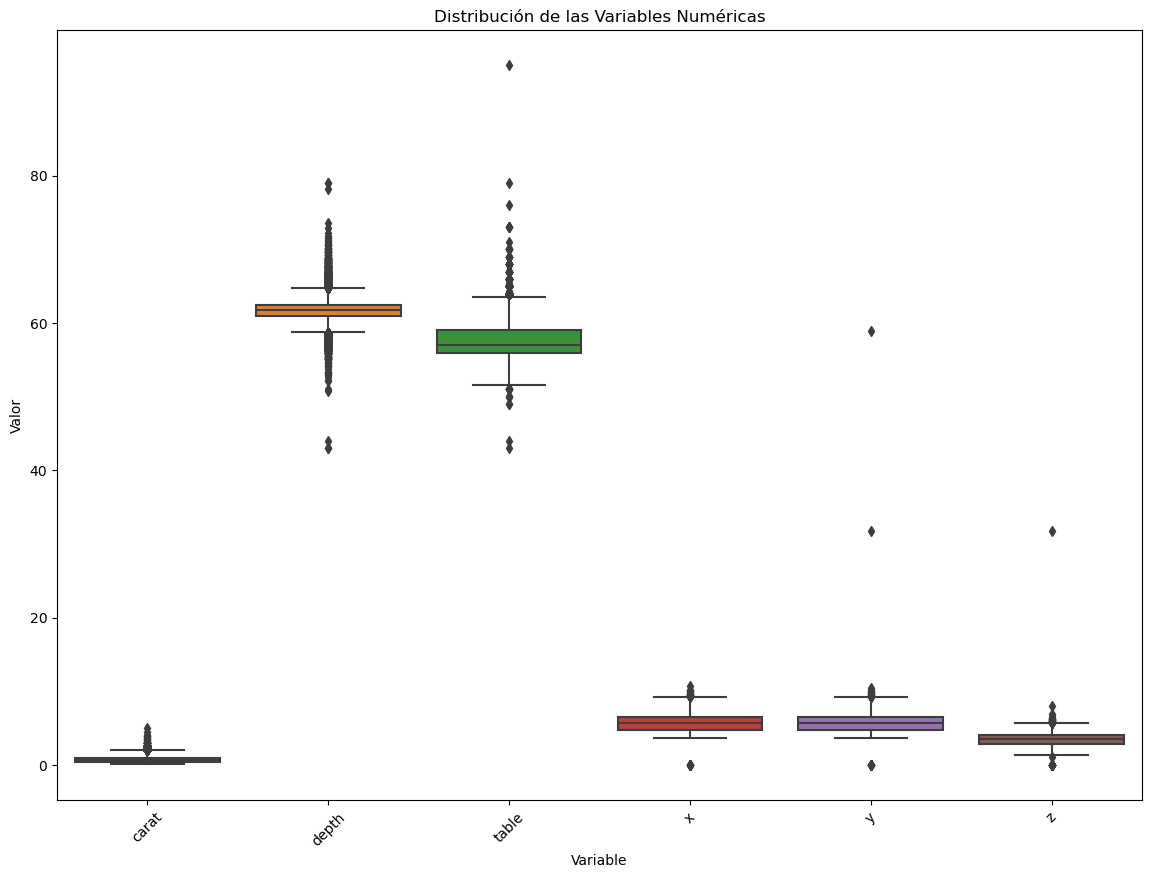

In [294]:
# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]

# Calcular los estadísticos mínimos, cuartiles y máximos
stats_dict = {}
for col in numeric_columns:
    stats_dict[col] = [
        filtered_df[col].min(),
        filtered_df[col].quantile(0.25),
        filtered_df[col].median(),
        filtered_df[col].quantile(0.75),
        filtered_df[col].max()
    ]

# Crear un DataFrame con los estadísticos
stats_df = pd.DataFrame(stats_dict, index=['Minimo', 'Quartil 25', 'Quartil 50', 'Quartil 75', 'Maximo'])

# Imprimir el DataFrame en formato markdown
print(stats_df.to_markdown(numalign="left", stralign="left"))

# Graficar boxplots para visualizar la distribución de cada variable
plt.figure(figsize=(14, 10))
sns.boxplot(data=filtered_df)
plt.title('Distribución de las Variables Numéricas')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

|    | Variable   | Desviación Estándar   | Rango Interquartil   |
|:---|:-----------|:----------------------|:---------------------|
| 0  | carat      | 0.474011              | 0.64                 |
| 1  | depth      | 1.43262               | 1.5                  |
| 2  | table      | 2.23449               | 3                    |
| 3  | x          | 1.12176               | 1.83                 |
| 4  | y          | 1.14213               | 1.82                 |
| 5  | z          | 0.705699              | 1.13                 |


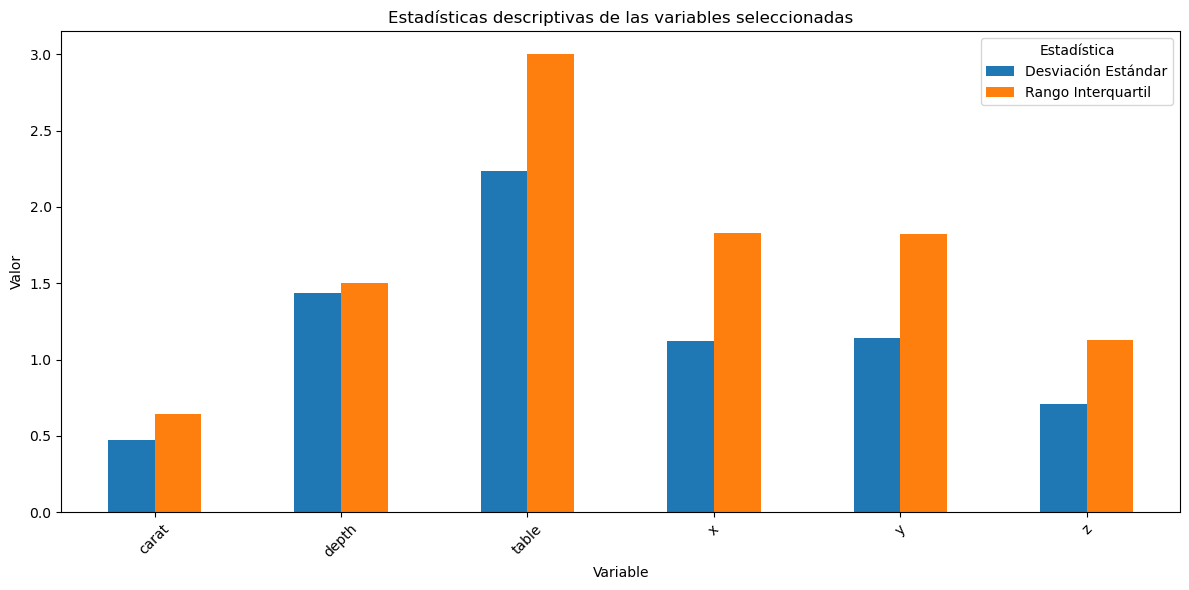

In [295]:
# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]

std = filtered_df.std().reset_index()
quartiles = filtered_df.quantile([0.25, 0.75])

iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

std = std.rename(columns={'index':'Variable', 0:'Valor'})
iqr = iqr.reset_index().rename(columns={'index':'Variable', 0:'Valor'})

std['Statistic'] = 'Desviación Estándar'
iqr['Statistic'] = 'Rango Interquartil'

merged_df = pd.concat([std, iqr])

pivoted_df = merged_df.pivot(index='Variable', columns='Statistic', values='Valor').reset_index()

print(pivoted_df.to_markdown(index=True, numalign="left", stralign="left"))

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
pivoted_df.plot(kind='bar', ax=ax)
plt.xticks(range(len(pivoted_df)), pivoted_df['Variable'], rotation=45)
plt.ylabel('Valor')
plt.title('Estadísticas descriptivas de las variables seleccionadas')
plt.xlabel('Variable')
plt.legend(title='Estadística')
plt.tight_layout()
plt.show()

In [301]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Correlation:
|       | carat   | depth   | table   | price   | x      | y      | z     |
|:------|:--------|:--------|:--------|:--------|:-------|:-------|:------|
| carat | 1       | 0.028   | 0.182   | 0.922   | 0.975  | 0.952  | 0.953 |
| depth | 0.028   | 1       | -0.296  | -0.011  | -0.025 | -0.029 | 0.095 |
| table | 0.182   | -0.296  | 1       | 0.127   | 0.195  | 0.184  | 0.151 |
| price | 0.922   | -0.011  | 0.127   | 1       | 0.884  | 0.865  | 0.861 |
| x     | 0.975   | -0.025  | 0.195   | 0.884   | 1      | 0.975  | 0.971 |
| y     | 0.952   | -0.029  | 0.184   | 0.865   | 0.975  | 1      | 0.952 |
| z     | 0.953   | 0.095   | 0.151   | 0.861   | 0.971  | 0.952  | 1     |


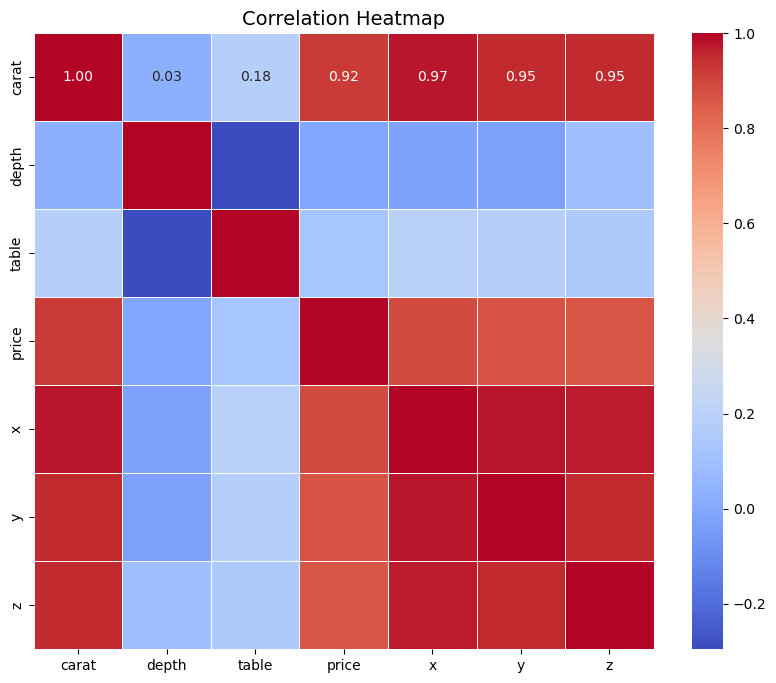

In [298]:
# Calculate the correlation matrix
#df = df.drop(columns=['Unnamed: 0'])
correlation_matrix = df.corr(numeric_only=True).round(3)

# Print the correlation matrix
print("Correlation:")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

       carat  depth  table  price      x      y      z
carat  1.000  0.028  0.182  0.922  0.975  0.952  0.953
depth  0.028  1.000 -0.296 -0.011 -0.025 -0.029  0.095
table  0.182 -0.296  1.000  0.127  0.195  0.184  0.151
price  0.922 -0.011  0.127  1.000  0.884  0.865  0.861
x      0.975 -0.025  0.195  0.884  1.000  0.975  0.971
y      0.952 -0.029  0.184  0.865  0.975  1.000  0.952
z      0.953  0.095  0.151  0.861  0.971  0.952  1.000


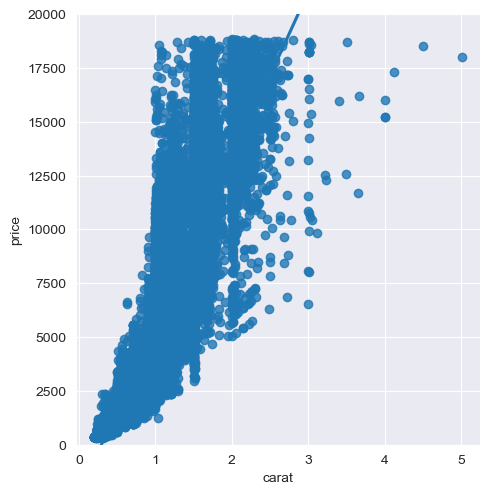

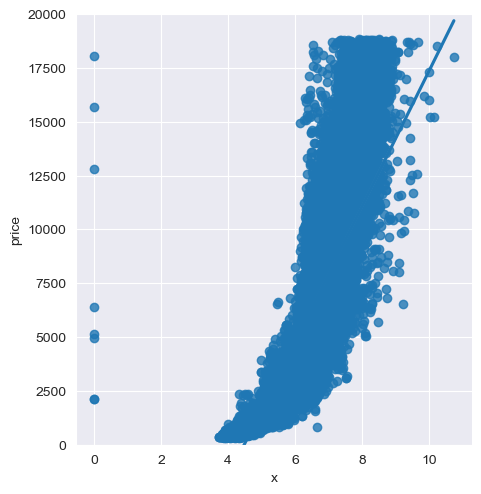

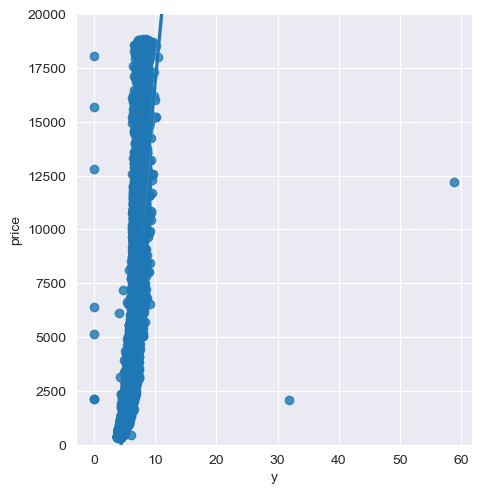

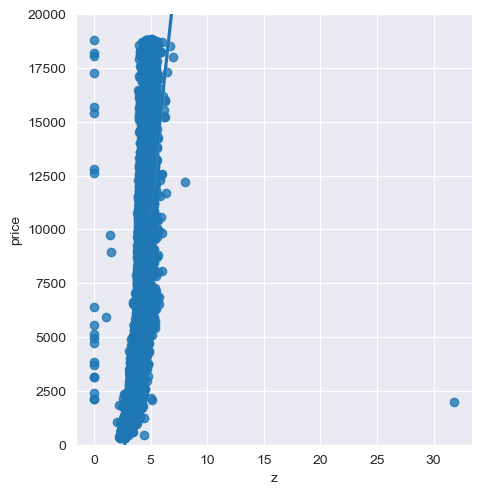

In [26]:
from seaborn import lmplot, load_dataset
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = load_dataset('diamonds')

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True).round(3)
print(correlation_matrix)

# Crear gráficos de regresión lineal con el rango de precio ajustado
lmplot(x='carat', y='price', data=df).set(ylim=(0, 20000))
lmplot(x='x', y='price', data=df).set(ylim=(0, 20000))
lmplot(x='y', y='price', data=df).set(ylim=(0, 20000))
lmplot(x='z', y='price', data=df).set(ylim=(0, 20000))

# Mostrar los gráficos
plt.show()


       carat  depth  table  price      x      y      z
carat  1.000  0.028  0.182  0.922  0.975  0.952  0.953
depth  0.028  1.000 -0.296 -0.011 -0.025 -0.029  0.095
table  0.182 -0.296  1.000  0.127  0.195  0.184  0.151
price  0.922 -0.011  0.127  1.000  0.884  0.865  0.861
x      0.975 -0.025  0.195  0.884  1.000  0.975  0.971
y      0.952 -0.029  0.184  0.865  0.975  1.000  0.952
z      0.953  0.095  0.151  0.861  0.971  0.952  1.000


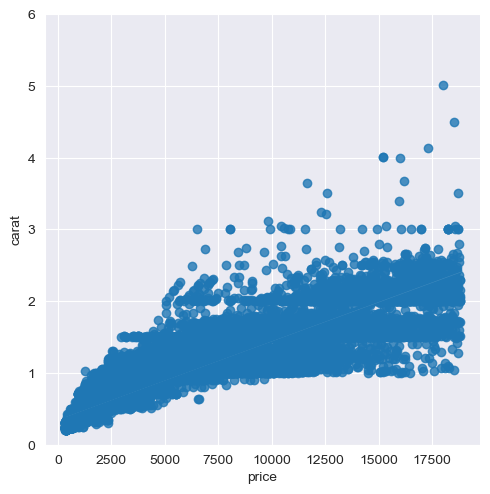

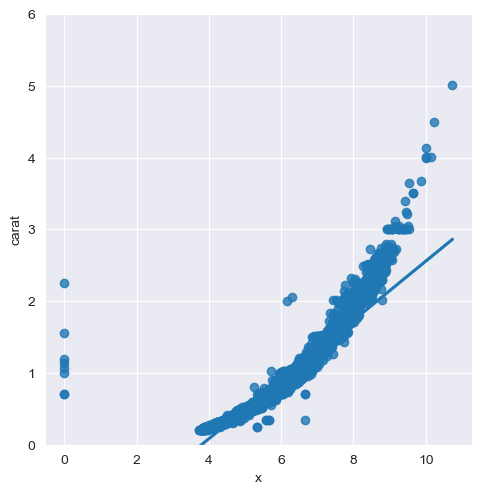

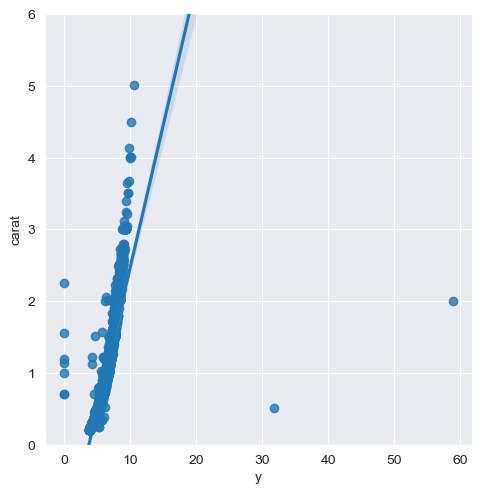

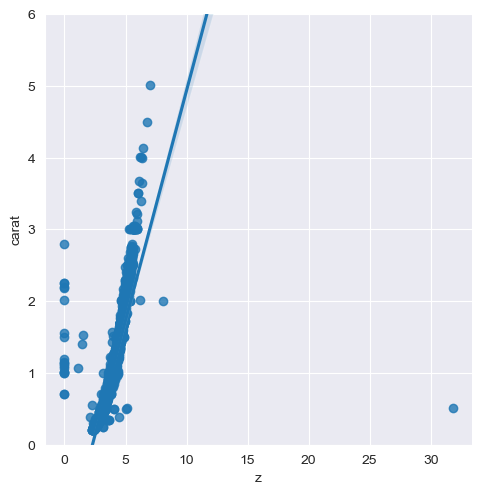

In [29]:
from seaborn import lmplot, load_dataset
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = load_dataset('diamonds')

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True).round(3)
print(correlation_matrix)

# Crear gráficos de regresión lineal con el rango de precio ajustado
lmplot(x='price', y='carat', data=df).set(ylim=(0, 6))
lmplot(x='x', y='carat', data=df).set(ylim=(0, 6))
lmplot(x='y', y='carat', data=df).set(ylim=(0, 6))
lmplot(x='z', y='carat', data=df).set(ylim=(0, 6))

# Mostrar los gráficos
plt.show()

In [300]:
df.query('x==0 or y==0 or z==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


<Axes: xlabel='carat', ylabel='price'>

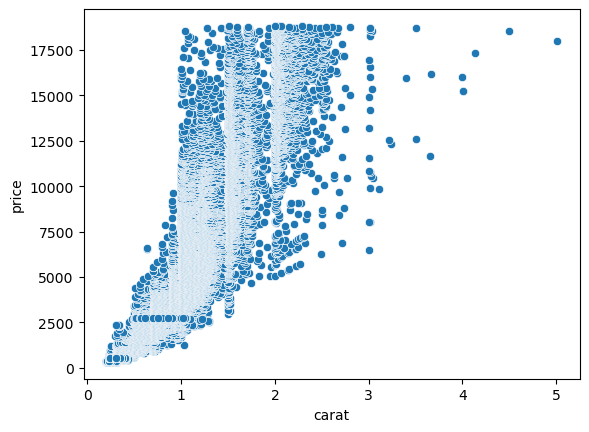

In [299]:
sns.scatterplot(x=df.carat , y=df.price)

In [304]:
len(df.query('carat>3'))

32

In [305]:
len(df.query('carat>2'))

1889

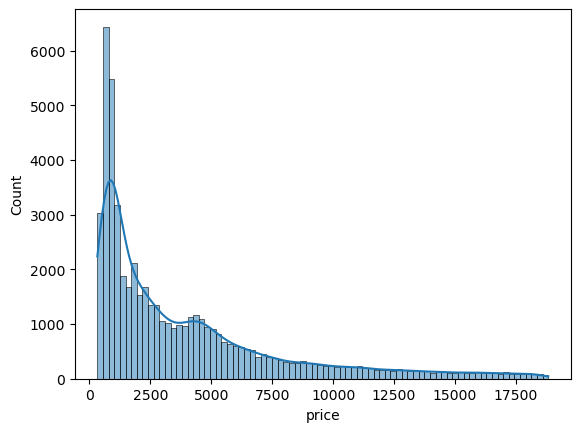

In [306]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.")
try:
    sns.histplot(df['price'], kde=True)
except Exception as e:
    print("Error:", e)

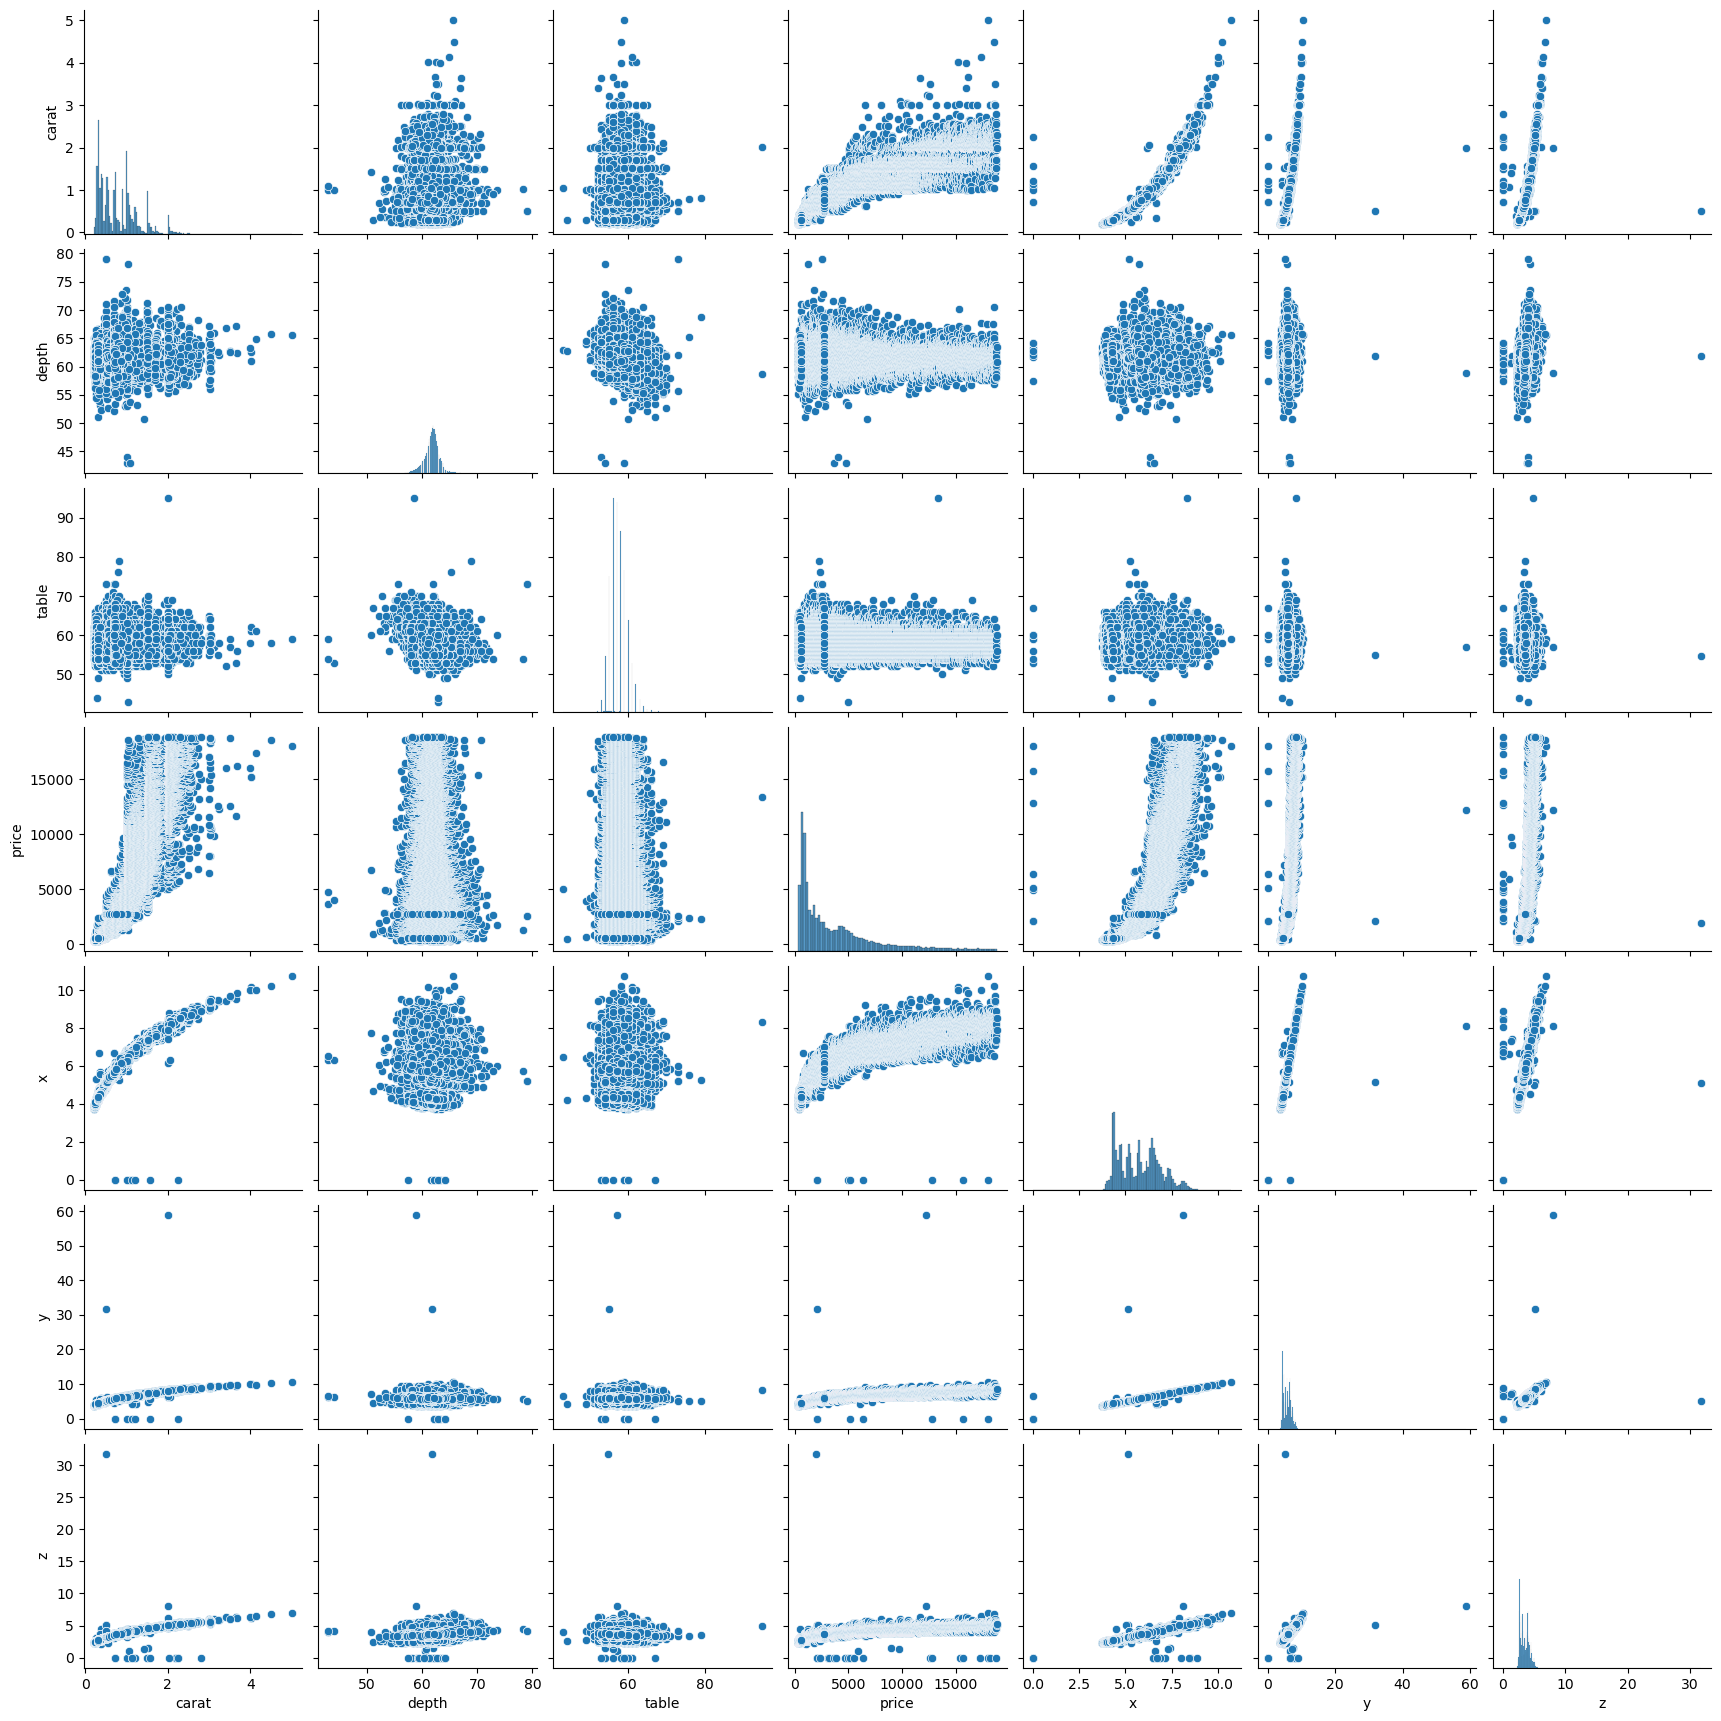

In [308]:
try:
    # Replace with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Remove NaN Values (optional)
    df.dropna(inplace=True)

    sns.pairplot(df)
except Exception as e:
    print("Error:", e)

# PREPARACIÓN DE LOS DATOS